<a href="https://colab.research.google.com/github/lmcanavals/ml/blob/main/1004_semisuperviced_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets.mnist import load_data

In [ ]:
(x_train, y_train), (x_test, y_test) = load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


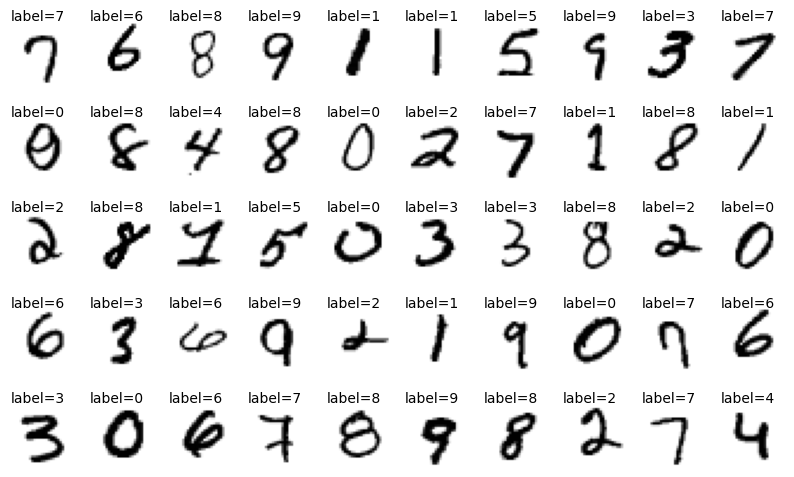

In [ ]:
fig, axs = plt.subplots(5, 10, figsize=(10, 6))
for i in range(5):
    for j in range(10):
        idx = random.randint(0, 60000)
        axs[i, j].imshow(x_train[idx], cmap="gray_r")
        axs[i, j].axis("off")
        axs[i, j].text(0, 0, f"label={y_train[idx]}")
plt.show()

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

m, r, c = x_train.shape
x_train = x_train.reshape((m, r*c))

m, r, c = x_test.shape
x_test = x_test.reshape((m, r*c))

In [ ]:
k = 50
kmeans = KMeans(n_clusters=k, random_state=42).fit(x_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
lbls = kmeans.labels_

In [ ]:

np.unique(lbls, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       dtype=int32),
 array([1072, 1516,  978, 1299, 1363, 1078, 1191, 1323, 1646, 1293,  858,
        1123, 1174, 1619, 1320,  668,  989,  754, 1097, 1182, 1229, 1401,
         664, 1281, 1050,  874, 1305, 1122, 1087, 1563, 1187, 1030, 1856,
        1107,  760, 1412,  962, 1494,  985, 1110, 1244, 1102, 1726, 1247,
        1703, 1330, 1266,  957, 1326, 1077]))

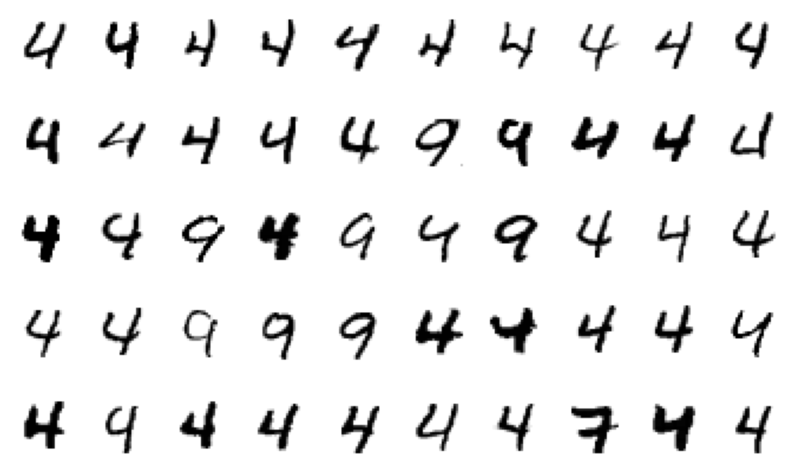

In [ ]:
x = x_train[lbls == 6]
fig, axs = plt.subplots(5, 10, figsize=(10, 6))
for i in range(5):
    for j in range(10):
        axs[i, j].imshow(x[i * 10 + j].reshape((28, 28)), cmap="gray_r")
        axs[i, j].axis("off")
        # axs[i, j].text(0, 0, f"label={y_train[idx]}")
plt.show()